## ## Q. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### 2) Salary_hike -> Build a prediction model for Salary_hike

## 1. Import Necessary Libraries

In [38]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,mean_absolute_error

## 2. Import Data

In [2]:
salary_data = pd.read_csv("E:\Data Science by John\Assignments\Assignment 4- Simple Linear Regression\Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. Data Understanding

### 3.1 Perform Initial Analysis

In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary_data.shape

(30, 2)

In [5]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### 3.2 Assumptions Check

### 1. Linearity Check

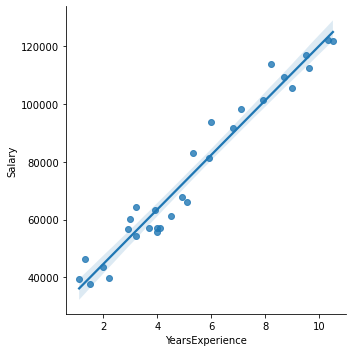

In [7]:
sns.lmplot(x="YearsExperience", y="Salary", data=salary_data)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### Linearity Test is passed

### 2. Normality Check

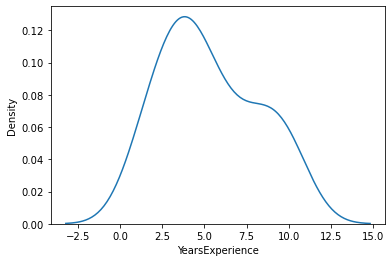

In [8]:
sns.distplot(a= salary_data['YearsExperience'], hist = False)
plt.show()

### Normality Test is Failed

### 3. Multicollinearity || 4. Autoregression
These test are passed because we have only one input so No Multicollinearity
& We don't have datetime datatype of our data

## 4. Data Preparation
Already in required format so no need to any changes

## 5. Model Building || 6. Model Training

### Using Sklearn 

In [9]:
x = salary_data[['YearsExperience']]
y = salary_data[['Salary']]

In [10]:
linear_model = LinearRegression()

In [11]:
linear_model_sk = linear_model.fit(x,y)

In [12]:
linear_model.coef_

array([[9449.96232146]])

In [13]:
linear_model.intercept_

array([25792.20019867])

## 7. Model Testing

### Manual Prediction

In [14]:
# y = mx+c
# If x = 2, y = ??
(9449.96232146 * 2) + 25792.20019867

44692.124841590005

In [15]:
# y = mx+c
# If x = 5, y = ??
(9449.96232146 * 5) + 25792.20019867

73042.01180597

In [16]:
# y = mx+c
# If x = 6.5, y = ??
(9449.96232146 * 6.5) + 25792.20019867

87216.95528816

In [17]:
# y = mx+c
# If x = 8, y = ??
(9449.96232146 * 8) + 25792.20019867

101391.89877035

In [18]:
# y = mx+c
# If x = 10, y = ??
(9449.96232146 * 10) + 25792.20019867

120291.82341327

### Automatic Prediction

In [19]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [20]:
X_test = pd.DataFrame(data={'YearsExperience':[2,5,6.5,8,10]})
X_test

,YearsExperience
0,2.0
1,5.0
2,6.5
3,8.0
4,10.0


In [21]:
linear_model_sk.predict(X_test)

array([[ 44692.12484158],
       [ 73042.01180594],
       [ 87216.95528813],
       [101391.89877031],
       [120291.82341322]])

In [22]:
y_pred = linear_model_sk.predict(x)
y_pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

## 8. Model Evaluation

In [23]:
error = y - y_pred
error

,Salary
0,3155.841248
1,8127.848783
2,-2236.143681
3,-1167.124842
4,-6691.117306
5,3444.909069
6,6007.912837
7,-1587.079627
8,8412.920373
9,-3568.060788


### .....back to Assumption Check

### 5. Homoscedasticity Check

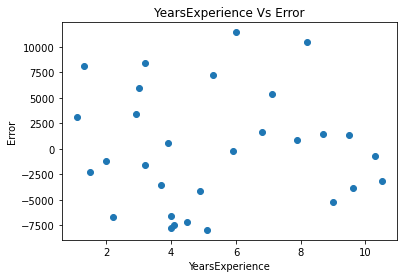

In [24]:
plt.scatter(x= salary_data['YearsExperience'], y=error)
plt.title('YearsExperience Vs Error')
plt.xlabel('YearsExperience')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Check is Passed

### 6. Zero Residual Mean across the Fitted Line.

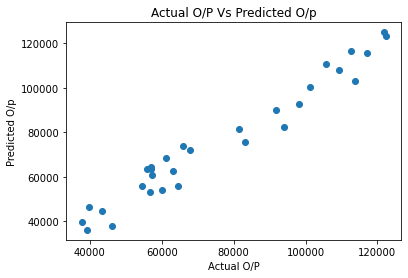

In [25]:
plt.scatter(x=salary_data['Salary'],y=y_pred)
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

### Zero Residual Mean Test is Passed

## Build Linear Model using StatsModels

## Model Building || Model Training

In [27]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
linear_model_stats = smf.ols(formula = 'Salary~YearsExperience', data = salary_data).fit()
linear_model_stats

In [30]:
linear_model_stats.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

## 8.1 Evaluation Metrics of Linear Regression

In [31]:
print('R2Score     :',linear_model_stats.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_stats.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_stats.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_stats.bic.round(4)) #Error Impurity
print('P-Value   \n:',linear_model_stats.pvalues)

R2Score     : 0.957
Adj.R2Score : 0.9554
AIC Value   : 606.8823
BIC Value   : 609.6847
P-Value   
: Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [39]:
mean_squared_error(y,y_pred)

31270951.722280968

In [40]:
mean_absolute_error(y,y_pred)

4644.2012894435375

In [33]:
y_pred_stats = linear_model_stats.predict(x)
y_pred_stats

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [42]:
error_stats = salary_data['Salary'] - y_pred_stats
error_stats

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64